# Growth Modes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_daily.csv'
df = pd.read_csv(URL)
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [4]:
model = Prophet(growth='linear', seasonality_mode='multiplicative', yearly_seasonality=4)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       2713.43   0.000947721       208.954   1.023e-05       0.001      151  LS failed, Hessian reset 
      99       2714.49   0.000871608       65.5509      0.4647      0.4647      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       2715.54    0.00113776       271.667   1.057e-05       0.001      275  LS failed, Hessian reset 
     199       2716.32   2.23266e-07       77.7627      0.5169      0.5169      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       2716.32   2.38135e-06       85.0662   3.088e-08       0.001      403  LS failed, Hessian reset 
     222       2716.32   1.63079e-07        78.506      0.2943      0.9709      413   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [6]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

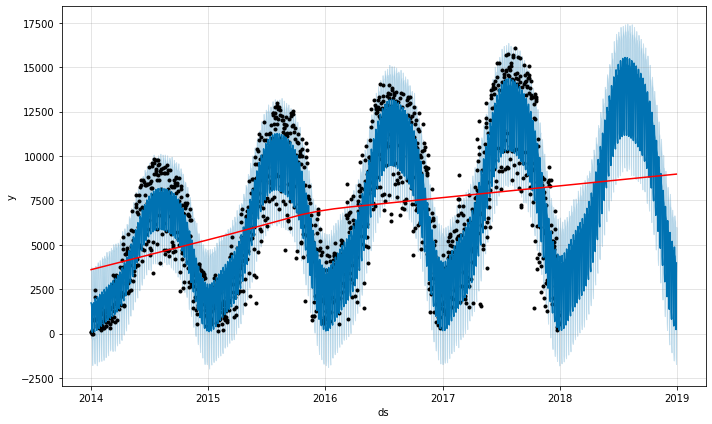

In [8]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

# The logistic function


$$
y=\frac{L}{1+e^{-k(x-x_{0})}}
$$

Here, L is the maximum value of the curve, k is the logistic growth rate, or steepness, of 
the curve, and x0 is the x-value of the curve's midpoint.

The equation was developed by Pierre François Verhulst, a Belgian mathematician, in 
a series of three papers published between 1838 and 1847. Verhulst was working to model 
the population growth of Belgium. 

Population growth approximately follows an initial exponential growth rate, then 
a linear, also known as arithmetic, growth rate, until the population hits a saturation point, 
where growth slows to zero. This is the shape you see in the preceding plot, starting at the 
curve's midpoint and moving right. Verhulst invented the term logistic to be analogous to 
arithmetic and geometric but derived from logarithmic. Don't get the word confused with 
logistics, as referring to the handling of details. They have completely different origins. 

## Modeling with linear growth

In [12]:
import numpy as np
import random
random.seed(42)  # set random seed for repeatability

In [13]:
x = pd.to_datetime(pd.date_range('1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())
y = [1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]  # create logistic curve
# add sinusoidal variation
y = [y[idx] + y[idx] * .01 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  
# add noise
y = [val + random.uniform(-.01, .01) for val in y]
y = [int(500 * val) for val in y]  # scale up

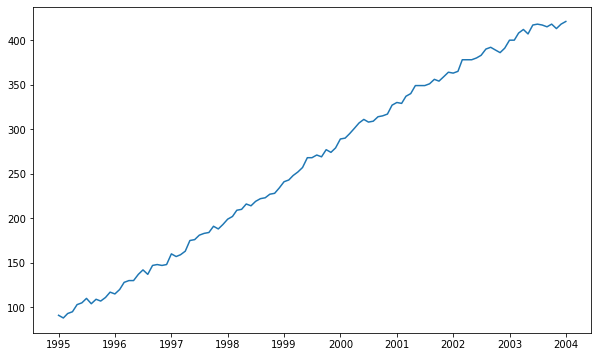

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

In [15]:
df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})

In [16]:
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.059
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


      71       477.298    5.6175e-05       171.002   6.195e-07       0.001      129  LS failed, Hessian reset 
      99       477.814   0.000133028       242.546      0.4924      0.4924      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       478.802   1.95707e-05       79.4982   2.211e-07       0.001      295  LS failed, Hessian reset 
     199       478.937    0.00144272       108.791           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207        479.03   5.38072e-05       189.529   4.455e-07       0.001      392  LS failed, Hessian reset 
     278       479.181   5.64343e-05       101.379   9.508e-07       0.001      545  LS failed, Hessian reset 
     299       479.189   5.68345e-06       57.7847      0.5064      0.5064      571   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     381       479.

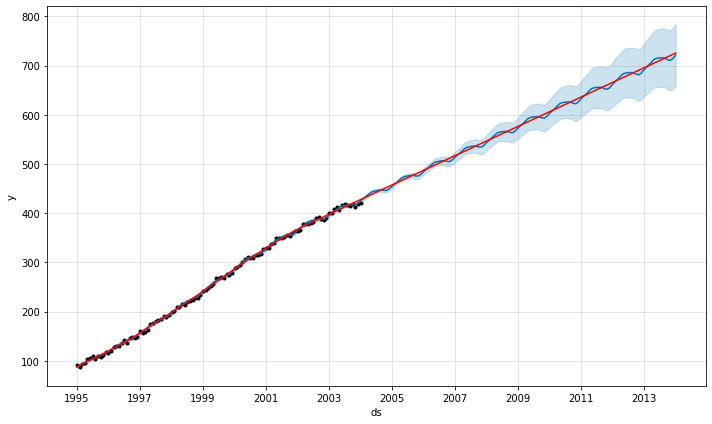

In [17]:
future = model.make_future_dataframe(periods=12 * 10,
                                     freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast,
                         cp_linestyle='')
plt.show()

## Modeling with logistic growth

With logistic growth, Prophet always requires that a ceiling be stated—a value that your 
forecast will not ever surpass. In cases where growth is declining, a floor must be stated 
as well. In this example, though, we have increasing growth, so we'll only set the ceiling. 
Prophet refers to it as a cap. To add this to Prophet, we need to create a new column in 
our training DataFrame called cap and also mimic it in our future DataFrame.

In [18]:
df['cap'] = 500

In [20]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.21357


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       490.468   0.000257955       186.009   1.962e-06       0.001      148  LS failed, Hessian reset 
      99       490.627    0.00145413       345.977           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       490.992   0.000249961       160.627   3.019e-06       0.001      259  LS failed, Hessian reset 
     199       491.034   3.92607e-05       84.7523       0.828       0.828      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260        491.05   7.72746e-07       60.9532    1.18e-08       0.001      434  LS failed, Hessian reset 
     277        491.05   2.75206e-08       49.8738           1           1      460   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [21]:
future = model.make_future_dataframe(periods=12 * 10, freq='M')
future['cap'] = 500

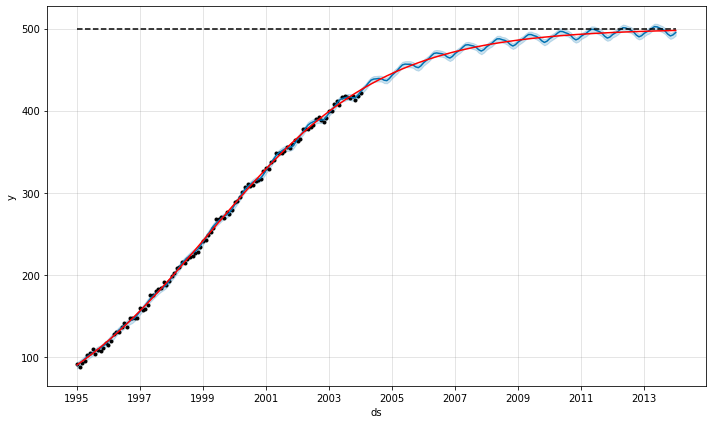

In [22]:
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast,
                         cp_linestyle='')
plt.show()

## Non constant cap

It is important to note that the cap does not necessarily need to be constant. If you 
are forecasting sales, for example, your saturation limit will be the market size. But 
this market size may be growing as various factors cause more consumers to consider 
purchasing your product.

Let's create a function to set the cap. For dates prior to 2007, we will keep the park's 
saturation limit of 500. For all dates starting in 2007, though, we will increase the cap by 
two per month:

In [23]:
def set_cap(row, df):
    if row.year < 2007:
        return 500
    else:
        pop_2007 = 500
        idx_2007 = df[df['ds'].dt.year == 2007].index[0]
        idx_date = df[df['ds'] == row].index[0]
        return pop_2007 + 2 * (idx_date - idx_2007)

In [24]:
df['cap'] = df['ds'].apply(set_cap, args=(df,))

In [26]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.21357


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       490.468   0.000257955       186.009   1.962e-06       0.001      148  LS failed, Hessian reset 
      99       490.627    0.00145413       345.977           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       490.992   0.000249961       160.627   3.019e-06       0.001      259  LS failed, Hessian reset 
     199       491.034   3.92607e-05       84.7523       0.828       0.828      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260        491.05   7.72746e-07       60.9532    1.18e-08       0.001      434  LS failed, Hessian reset 
     277        491.05   2.75206e-08       49.8738           1           1      460   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


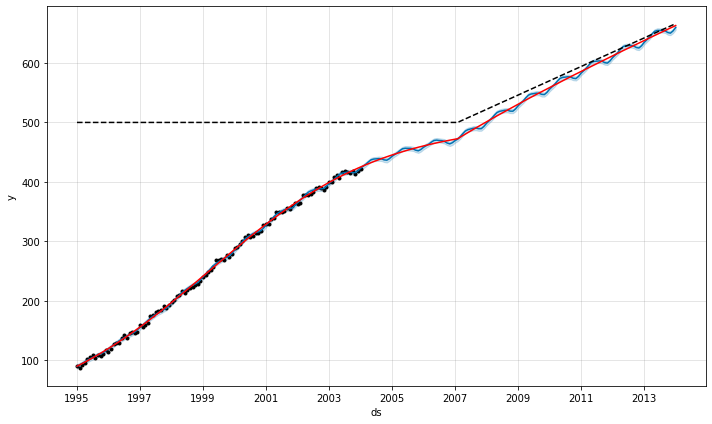

In [27]:
future = model.make_future_dataframe(periods=12 * 10, freq='M')
future['cap'] = future['ds'].apply(set_cap, args=(future,))
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

## Decreasing logistic function

The only difference in this example is that we must also state a floor value in addition to 
a cap value

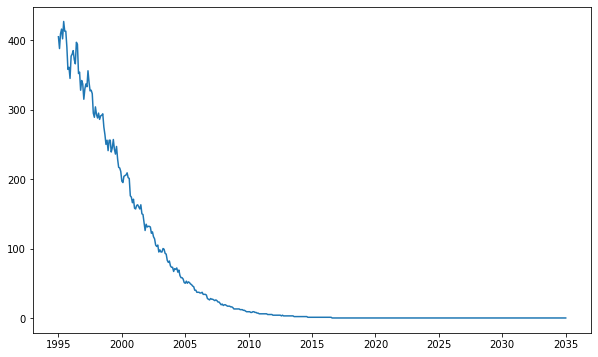

In [28]:
x = pd.to_datetime(pd.date_range('1995-01','2035-02', freq='M').strftime("%Y-%b").tolist())
y = [1 - 1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]  # create logistic curve
y = [y[idx] + y[idx] * .05 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation
y = [val + 5 * val * random.uniform(-.01, .01) for val in y]  # add noise
y = [int(500 * val) for val in y]  # scale up
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

In [29]:
df2 = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})
df2 = df2[df2['ds'].dt.year < 2006]
df2['cap'] = 500
df2['floor'] = 0

In [30]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.37339


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       484.474   4.19617e-07       95.2142      0.7795      0.7795      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       484.474   3.58827e-09       86.5084      0.1974      0.1974      144   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


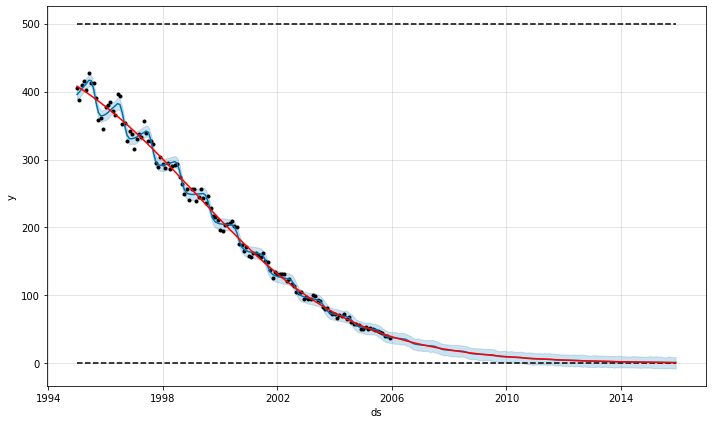

In [31]:
future = model.make_future_dataframe(periods=12 * 10, freq='M')
future['cap'] = 500
future['floor'] = 0
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()